In [1]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#### 6.1 Решите линейную систему
$\begin{bmatrix}
       1 & 2 & 3 \\
       4 & 0 & 6 \\
       7 & 8 & 9  
     \end{bmatrix} * Х  = \begin{bmatrix}
       12 \\
       2  \\
       1  
     \end{bmatrix}$

In [2]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])

In [3]:
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

#### 6.2  Найдите псевдорешение  
$x + 2y – z = 1$  
$3x – 4y = 7$  
$8x – 5y + 2z = 12$  
$2x – 5z = 7$  
$11x +4y – 7z = 15$


In [4]:
A = np.array([[1,2,-1],[3,-4,0],[8,-5,2],[2,0,-5],[11,4,-7]])
B = np.array([1,7,12,7,15])
X = np.linalg.lstsq(A, B)[0]
X

array([ 1.13919353, -0.90498444, -0.9009803 ])

In [5]:
np.dot(A, X)

array([ 0.23020495,  7.03751834, 11.83650981,  6.78328855, 15.21805313])

#### 6.3 Сколько решений имеет линейная система:
$\begin{bmatrix}
       1 & 2 & 3 \\
       4 & 5 & 6 \\
       7 & 8 & 9  
     \end{bmatrix} * Х  = \begin{bmatrix}
       12 \\
       2  \\
       1  
     \end{bmatrix}$

In [6]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [7]:
abs(round(np.linalg.det(A)))

0.0

Система уравнений вырожденная. Изменим вектор правой части, чтобы система стала совместной.

In [8]:
B = np.array([[8, 10, 12]])
C = np.concatenate((A, B.T), axis=1)

In [9]:
C

array([[ 1,  2,  3,  8],
       [ 4,  5,  6, 10],
       [ 7,  8,  9, 12]])

In [10]:
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

(2, 2)

In [11]:
B = B[0]
np.linalg.solve(A,B)

array([-14.66666667,  23.33333333,  -8.        ])

#### 6.4 Вычислите LU-разложение матрицы:
$\begin{bmatrix}
       1 & 2 & 3 \\
       2 & 16 & 21 \\
       4 & 28 & 73  
     \end{bmatrix}$  
       
     После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [12]:
import scipy
import scipy.linalg

In [13]:
A = np.array([[1, 2, 3], [2, 16, 21], [4, 28, 73]])

In [14]:
np.linalg.matrix_rank(A)

3

In [15]:
P, L, U = scipy.linalg.lu(A)
print('P', P)
print('L', L)
print('U', U)

P [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
L [[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
U [[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


In [16]:
V = np.array([11, 13, 21])

In [17]:
Y = np.linalg.solve(L, V)

In [18]:
X = np.linalg.solve(U, Y)
print('Решение: ', X)

Решение:  [14.28703704  0.71759259 -0.90740741]


#### 6.5 Найти нормальное псевдорешение недоопределенной системы  
Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум.  
$x + 2y – z = 1$  
$8x – 5y + 2z = 12$

In [19]:
A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1, 12])

In [20]:
Q, R = np.linalg.qr(A)
print(Q), print(R)

[[-0.12403473 -0.99227788]
 [-0.99227788  0.12403473]]
[[-8.06225775  4.71331991 -1.86052102]
 [ 0.         -2.60472943  1.24034735]]


(None, None)

In [21]:
print(np.dot(Q, R))

[[ 1.  2. -1.]
 [ 8. -5.  2.]]


In [22]:
R2 = R[:2, :2]
R2

array([[-8.06225775,  4.71331991],
       [ 0.        , -2.60472943]])

In [23]:
SP = np.dot(Q.T, B)
SP

array([-12.03136926,   0.49613894])

In [24]:
X = np.linalg.solve(R2, SP)
print('Решение: X ', X)

Решение: X  [ 1.38095238 -0.19047619]


In [25]:
PX = np.append(X, 0)
print('Псевдорешение: PX ', PX)

Псевдорешение: PX  [ 1.38095238 -0.19047619  0.        ]


In [26]:
np.linalg.norm(PX)

1.3940267779337574

In [27]:
np.linalg.norm(np.dot(A, PX) - B)

2.5121479338940403e-15

In [28]:
def Q(x, y, z):
    return x**2 + y**2 + z**2

In [29]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

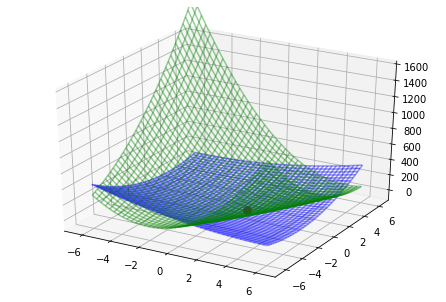

In [30]:
fig = figure()
ax = Axes3D(fig)
x = np.linspace(-6, 6, 201)
y = np.linspace(-6, 6, 201)
x, y = np.meshgrid(x, y)
z1 = Q(x, y, x + 2*y - 1)
z2 = Q(x, y, 6 - 4*x + 2.5*y)
ax.set_xlim3d(-7, 7)
ax.set_ylim3d(-7, 7)
ax.set_zlim3d(-100, 1600)
ax.plot_wireframe(x, y, z1, color='blue', alpha=0.4)
ax.plot_wireframe(x, y, z2, color='green', alpha=0.4)
ax.scatter(1.38095238, -0.19047619,  0.0, 'z', 60, 'red');

#### 6.6 Найдите одно из псевдорешений вырожденной системы. Попробуйте также отыскать и нормальное псевдорешение.
$\begin{bmatrix}
       1 & 2 & 3 \\
       4 & 5 & 6 \\
       7 & 8 & 9  
     \end{bmatrix} * Х  = \begin{bmatrix}
       2 \\
       5  \\
       11  
     \end{bmatrix}$

In [31]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([2, 5, 11])

In [32]:
np.linalg.det(A)

6.66133814775094e-16

In [33]:
s = np.linalg.lstsq(A, B)
x = s[0]
print('Псевдорешение: ')
print(x)

Псевдорешение: 
[ 1.25  0.5  -0.25]


In [34]:
xn = np.linalg.norm(np.dot(A, x) - B)
print('Нормальное псевдорешение: ')
print(xn)

Нормальное псевдорешение: 
1.2247448713915883
